In [1]:
import os
from matplotlib import pyplot
import numpy as np
import json

In [2]:
scores_path = os.path.join(os.getcwd(),'scores')
user_based_scores_path = os.path.join(scores_path, 'user_based')
item_based_scores_path = os.path.join(scores_path, 'item_based')

MAEs_path = os.path.join(user_based_scores_path, 'MAEs.txt')
sim_non_diversified_path = os.path.join(user_based_scores_path, 'intra-similarities_scores_non_diversified.txt')
sim_diversified_path = os.path.join(user_based_scores_path, 'intra-similarities_scores_diversified.txt')

with open(MAEs_path,'r') as fr:
    MAEs_user_based = json.load(fr)

with open(sim_non_diversified_path,'r') as fr:
    mean_similarities_non_diversified_user_based = json.load(fr)

with open(sim_diversified_path,'r') as fr:
    mean_similarities_diversified_user_based = json.load(fr)

MAEs_path = os.path.join(item_based_scores_path, 'MAEs.txt')
sim_non_diversified_path = os.path.join(item_based_scores_path, 'intra-similarities_scores_non_diversified.txt')
sim_diversified_path = os.path.join(item_based_scores_path, 'intra-similarities_scores_diversified.txt')


with open(MAEs_path,'r') as fr:
    MAEs_item_based = json.load(fr)

with open(sim_non_diversified_path,'r') as fr:
    mean_similarities_non_diversified_item_based = json.load(fr)

with open(sim_diversified_path,'r') as fr:
    mean_similarities_diversified_item_based = json.load(fr)

In [3]:
diversification_factors = list(np.linspace(0,1,11))

sorted_maes_ub = []
sorted_non_diversified_sim_ub = []
sorted_diversified_sim_ub = []
for factor in diversification_factors:
    sorted_maes_ub.append(MAEs_user_based[str(factor)])
    sorted_non_diversified_sim_ub.append(mean_similarities_non_diversified_user_based[str(factor)])
    sorted_diversified_sim_ub.append(mean_similarities_diversified_user_based[str(factor)])

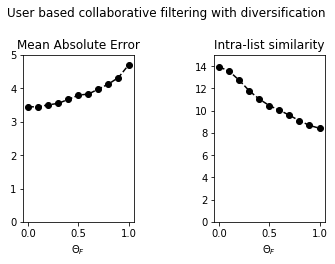

In [5]:
fig, axs = pyplot.subplots(1,2)
fig.tight_layout(pad=5)
fig.suptitle('User based collaborative filtering with diversification')

axs[0].plot(diversification_factors, sorted_maes_ub, linestyle='--', marker='o', color='black')
axs[0].set_ylim((0,5))
axs[0].set_title('Mean Absolute Error')
axs[0].set_xlabel(r'$\Theta_{F}$')

axs[1].plot(diversification_factors, sorted_diversified_sim_ub, linestyle='--', marker='o', color='black')
axs[1].set_ylim((0,15))
axs[1].set_title('Intra-list similarity')
axs[1].set_xlabel(r'$\Theta_{F}$')

pyplot.show()

pass

In [6]:
diversification_factors = list(np.linspace(0,1,11))

sorted_maes = []
sorted_non_diversified_sim = []
sorted_diversified_sim = []
for factor in diversification_factors:
    sorted_maes.append(MAEs_item_based[str(factor)])
    sorted_non_diversified_sim.append(mean_similarities_non_diversified_item_based[str(factor)])
    sorted_diversified_sim.append(mean_similarities_diversified_item_based[str(factor)])

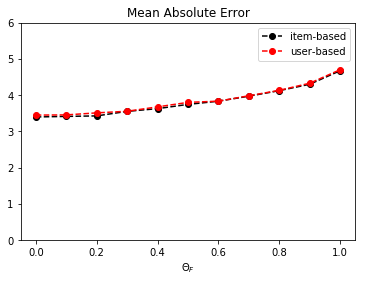

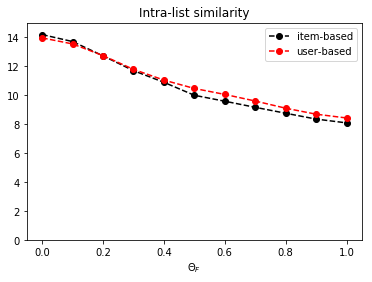

In [8]:
pyplot.plot(diversification_factors, sorted_maes, linestyle='--', marker='o', color='black')
pyplot.plot(diversification_factors, sorted_maes_ub, linestyle='--', marker='o', color='red')
pyplot.title('Mean Absolute Error')
pyplot.xlabel(r'$\Theta_{F}$')
pyplot.ylim((0,6))
pyplot.legend(['item-based','user-based'])
pyplot.show()

pyplot.plot(diversification_factors, sorted_diversified_sim, linestyle='--', marker='o', color='black')
pyplot.plot(diversification_factors, sorted_diversified_sim_ub, linestyle='--', marker='o', color='red')
pyplot.title('Intra-list similarity')
pyplot.xlabel(r'$\Theta_{F}$')
pyplot.ylim(0,15)
pyplot.legend(['item-based','user-based'])
pyplot.show()

pass

In [ ]:
# books' dataset

In [4]:
list_value_difference_books_path = os.path.join(os.getcwd(), 'result.json')

with open(list_value_difference_books_path,'r') as fr:
    list_value_difference_books_ib = json.load(fr)

list_value_difference_books_ub = {0: {'list_value': 46.077012643142716, 'precision': 0.8605504587155967, 'recall': 0.27725029568689513, 'list_value_difference': 7.475477572710484}, 1: {'list_value': 46.023506790723744, 'precision': 0.857798165137615, 'recall': 0.2767810579000114, 'list_value_difference': 7.528983425129471}, 2: {'list_value': 46.091855981478176, 'precision': 0.8587155963302756, 'recall': 0.2755352936960629, 'list_value_difference': 7.460634234375052}, 3: {'list_value': 45.99070746986051, 'precision': 0.8559633027522937, 'recall': 0.27534353637289405, 'list_value_difference': 7.561782745992666}, 4: {'list_value': 45.992581117466564, 'precision': 0.8577981651376146, 'recall': 0.27591534336022716, 'list_value_difference': 7.55990909838662}, 5: {'list_value': 45.934525253765955, 'precision': 0.8587155963302756, 'recall': 0.27792040809604135, 'list_value_difference': 7.617964962087247}, 6: {'list_value': 45.97036726881642, 'precision': 0.859633027522936, 'recall': 0.27685725093247526, 'list_value_difference': 7.582122947036766}, 7: {'list_value': 45.88865883884897, 'precision': 0.8577981651376151, 'recall': 0.27592870839792377, 'list_value_difference': 7.66383137700422}, 8: {'list_value': 45.90037812550877, 'precision': 0.8568807339449545, 'recall': 0.27502665997780434, 'list_value_difference': 7.652112090344415}, 9: {'list_value': 45.9628257818246, 'precision': 0.8568807339449545, 'recall': 0.2745316536619409, 'list_value_difference': 7.589664434028555}}

In [10]:
diversification_factors = list(np.linspace(0,9,10))
MAEs_ib = []
MAEs_ub = []

for div_factor in diversification_factors:
    MAE_ib = list_value_difference_books_ib[str(div_factor)[0]]['list_value_difference']
    MAEs_ib.append(MAE_ib)

    MAE_ub = list_value_difference_books_ub[div_factor]['list_value_difference']
    MAEs_ub.append(MAE_ub)


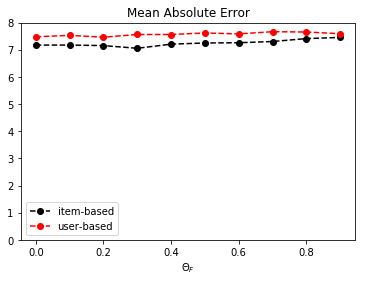

In [12]:
diversification_factors = list(np.linspace(0,0.9,10))

pyplot.plot(diversification_factors, MAEs_ib, linestyle='--', marker='o', color='black')
pyplot.plot(diversification_factors, MAEs_ub, linestyle='--', marker='o', color='red')
pyplot.title('Mean Absolute Error')
pyplot.xlabel(r'$\Theta_{F}$')
pyplot.ylim((0,8))
pyplot.legend(['item-based','user-based'])
pyplot.show()


pass